In [29]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import utils.save_results
import utils.read_results
import utils.model_setup
import utils.dataset_setup
import utils.experiment_setup
import utils.metric_setup

Matplotlib is building the font cache; this may take a moment.


In [30]:
reload(utils.save_results)
reload(utils.read_results)
reload(utils.model_setup)
reload(utils.dataset_setup)
reload(utils.experiment_setup)
reload(utils.metric_setup)

<module 'utils.metric_setup' from '/home/daniel/Documents/IME/9sem/tcc/AutomatedENEMEssaysCorrectionUsingChatBots/utils/metric_setup.py'>

In [31]:
path_to = "./data/"

In [33]:
"""
Setup Model
"""
model_name, model_code = choose_model()
chat = model_setup(model_name)

ATENTION - Choose the model:
1 - gemini-1.5-flash
2 - llama-3.2-90b-text-preview
3 - other


Input the number you would like to execute:  2


Choosen Model: llama-3.2-90b-text-preview


In [34]:
"""
Setup Dataset
"""
dataset_name, dataset_code = setup_dataset()

ATENCAO - Escolha o dataset:
1 - essaysFullGrade
2 - aes_enem_dataset
3 - propor2024
4 - extended2024
5 - extended_complete
6 - Outro


Coloque o número do dataset que gostaria de executar:  2


Dataset escolhido: aes_enem_dataset


In [35]:
"""
Setup Metric
"""
metric_name = choose_metric()

ATENCAO - Escolha a metrica:
1 - QWK
2 - RMSE
3 - MAE
4 - other


Coloque o número do modelo que gostaria de executar:  2


In [36]:
means = []
stds = []
for j in range(1, 2):
  experiment_name, experiment_code = choose_experiment(j)
  comp = []
  results = []
  path_to_save = create_experiment_folder(path_to, model_name, experiment_name, dataset_name)

  for i in range(1, 5):
    id = str(i)
    
    filename_to_save = build_filename_to_save(model_name, experiment_name, dataset_name, id)
    dataset = read_csv(path_to_save, filename_to_save)
    print(id)
    print(experiment_code) 
    nota_original, nota_model = get_grades(dataset, model_name)
    print(nota_original)
    print(nota_model)

    if metric_name == QWK:
      metric_values = calculate_qwk(nota_original, nota_model)
    elif metric_name == RMSE:
      metric_values = calculate_rmse(nota_original, nota_model)
    elif metric_name == MAE:
        metric_values = calculate_mae(nota_original, nota_model)

    print(metric_values)
    results.append(metric_values)

  # Convert the list to a NumPy array
  np_matrix = np.array(results)

  # Calculate the mean along the columns (axis=0)
  column_means = np.mean(np_matrix, axis=0)
  means.append(column_means)

  # Calculate the standard deviation along the columns (axis=0)
  column_std = np.std(np_matrix, axis=0)
  stds.append(column_std)

Experimento escolhido: exp1
Folder './data/results/llama-3.2-90b-text-preview' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1' already exists.
Folder './data/results/llama-3.2-90b-text-preview/exp1/aes_enem_dataset' already exists.
CSV with the answer will be saved in: aes_enem_dataset-llama-3.2-90b-text-preview-exp1-1
1
1
[[120, 120, 80, 120, 120, 560], [160, 120, 160, 120, 120, 680], [0, 0, 0, 0, 0, 0], [160, 80, 120, 160, 0, 520], [120, 120, 120, 120, 80, 560], [200, 200, 160, 120, 0, 680], [120, 120, 80, 120, 40, 480], [120, 200, 120, 120, 120, 680], [160, 200, 160, 160, 160, 840], [80, 40, 40, 120, 40, 320], [80, 40, 80, 80, 40, 320], [120, 160, 160, 120, 160, 720], [160, 160, 200, 200, 160, 880], [120, 40, 40, 160, 40, 400], [120, 120, 120, 120, 160, 640], [120, 120, 120, 120, 80, 560], [120, 120, 120, 160, 80, 600], [120, 120, 120, 120, 80, 560], [160, 40, 40, 120, 40, 400], [120, 120, 80, 120, 120, 560], [160, 120, 120, 120, 160, 680], [120, 160, 120, 12

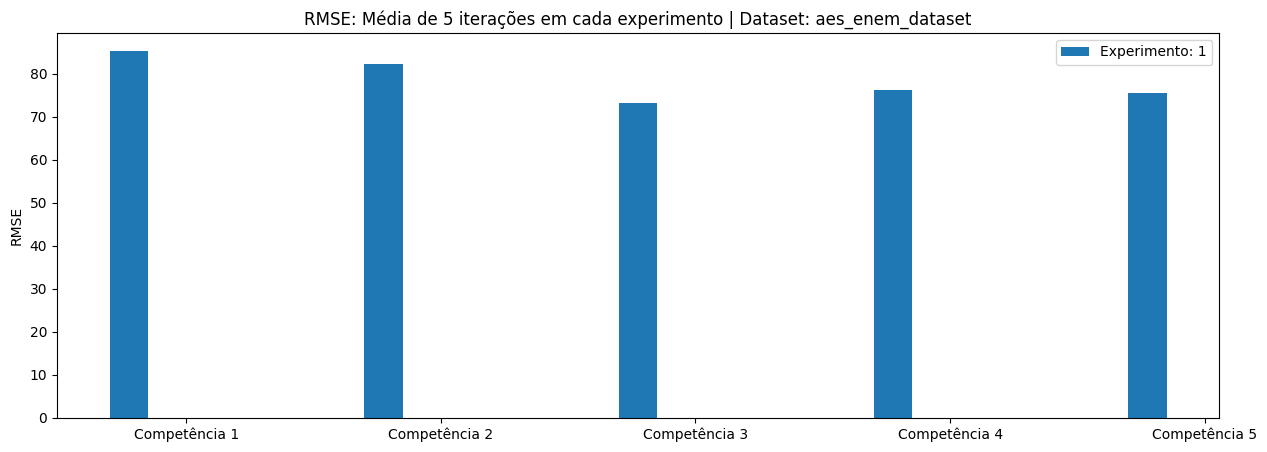

In [37]:
# Dados de exemplo
comp = list(range(1, 6))

# Configurações
fig, ax = plt.subplots(figsize=(15, 5))
bar_width = 0.15
x = np.arange(len(comp))

for i in range(len(means)):
    plt.bar(x + i * bar_width, means[i], width=bar_width, label=f"Experimento: {i+1}")

custom_labels = ["Competência 1", "Competência 2", "Competência 3", "Competência 4", "Competência 5"]
plt.xticks(x + bar_width * 1.5, custom_labels)

plt.ylabel(metric_name)
plt.title(f"{metric_name} : Média de 5 iterações em cada experimento | Modelo: {model_name}  | Dataset: {dataset_name}")

plt.legend()
plt.show()